## Installation

- Install Flow* v2.1.0
    - https://flowstar.org/dowloads/
    - https://www.cs.colorado.edu/~xich8622/manual/manual-2.0.0.pdf

- Install gradle
    - (Fedora) https://tecadmin.net/install-gradle-fedora/

- Install VERISIG
    - https://github.com/Verisig/verisig

## Running the example

```bash
$ pwd
/home/mforets/Tools/verisig-master
[mforets@localhost verisig-master]$ ./verisig --flowstar-cmd flowstar/flowstar examples/mountain_car/MC.xml examples/mountain_car/sig16x16.yml
Initial states not defined. Using default values.
mode: mode2,	time = 0.000001,	step = 0.000001,	order = 4
Dealing with the jump from mode2 to mode3 ...
No intersection detected.
Done.
Dealing with the jump from mode2 to m0 ...
Done.
Dealing with the jump from mode2 to m0 ...
No intersection detected.
Done.
mode: m0,	time = 0.000001,	step = 0.000001,	order = 4
Dealing with the jump from m0 to DNNm1 ...
Done.
mode: DNNm1,	time = 0.000001,	step = 0.000001,	order = 4
Dealing with the jump from DNNm1 to _reset_mode1 ...
Done.

Computation completed: 4 flowpipe(s) computed.

Result of the safety verification on the computed flowpipes: UNSAFE

Total time cost: 0.053845 seconds.

Preparing for plotting and dumping...
%100
Done.
Generating the plotting file...
%100
Done.
Writing the flowpipe(s)...
Done.
```

---

This should produce the files

```bash
$ ls outputs/
autosig.flow  autosig.plt

[mforets@localhost verisig-master]$ head outputs/autosig.plt 
set terminal postscript enhanced color
set output './images/autosig.eps'
set style line 1 linecolor rgb "blue"
set autoscale
unset label
set xtic auto
set ytic auto
set xlabel "clock"
set ylabel "_f1"
plot '-' notitle with lines ls 1
```

- The file `.flow` contains the Taylor models.

- The file `.plt` contains the vertices of an overapproximation of the taylor models using polygons.

---

## Output visualization

In [11]:
using DelimitedFiles

In [24]:
file = "outputs/autosig_clean.plt"

"outputs/autosig_clean.plt"

In [26]:
# See https://github.com/JuliaReach/LazySets.jl/pull/2377
function read_gen(filename::String)
    Mi = Vector{Vector{Float64}}()
    P = Vector{VPolygon{Float64, Vector{Float64}}}()

    # detects when we finished reading a new polygon, needed because polygons
    # may be separated by more than one end-of-line
    new_polygon = true
    open(filename) do f
        for line in eachline(f)
          if !isempty(line)
              push!(Mi, map(x -> parse(Float64, x), split(line)))
              new_polygon = true
          elseif isempty(line) && new_polygon
              push!(P, VPolygon(Mi))
              Mi = Vector{Vector{Float64}}()
              new_polygon = false
          end
        end
    end
    return P
end

read_gen (generic function with 1 method)

In [29]:
out = read_gen(file)

3-element Array{VPolygon{Float64,Array{Float64,1}},1}:
 VPolygon{Float64,Array{Float64,1}}([[-0.0, -0.0]])
 VPolygon{Float64,Array{Float64,1}}([[-0.0, -0.5], [0.0, -0.48]])
 VPolygon{Float64,Array{Float64,1}}([[-0.0, -0.5], [0.0, -0.48]])

In [32]:
out[1]

VPolygon{Float64,Array{Float64,1}}([[-0.0, -0.0]])

In [33]:
out[2]

VPolygon{Float64,Array{Float64,1}}([[-0.0, -0.5], [0.0, -0.48]])

In [34]:
out[3]

VPolygon{Float64,Array{Float64,1}}([[-0.0, -0.5], [0.0, -0.48]])

In [28]:
using LazySets, Plots

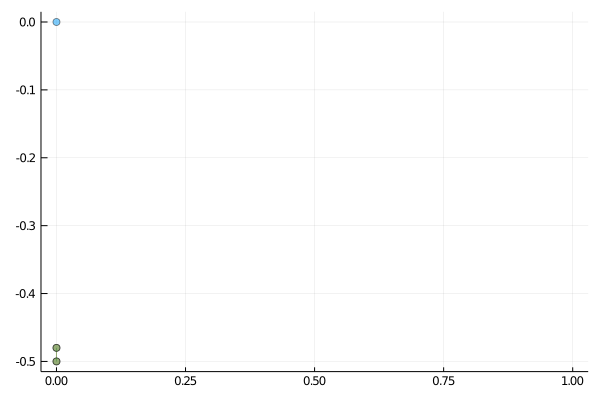

In [31]:
plot(out)

## Running all test sets

https://github.com/Verisig/verisig/blob/master/examples/mountain_car/multi_runner.py